We have performed a comparitive study of 3 different models for the "**Hand-Written Digit Recognizer**" dataset from MNIST. 
We have imported the necessary libraries for performing the above models. 

In [1]:
#Python Genric Modules
import numpy as np 
import pandas as pd


#DataSet Manipulaters
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator




#Neural Networks 
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout ,Flatten, Conv2D, MaxPool2D

#Data Visualization
import matplotlib.pyplot as plt
import platform
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Algorithmns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB















We are loading the dataset into useable variables for easy manipulation.

In [2]:
X_train,Y_train= loadlocal_mnist(images_path='../input/first1/train-images.idx3-ubyte',
                    labels_path='../input/first1/train-labels.idx1-ubyte')

X_test,Y_test= loadlocal_mnist(images_path='../input/first1/t10k-images.idx3-ubyte',
                    labels_path='../input/first1/t10k-labels.idx1-ubyte')



We have performed a graphical visualization of the dataset using 'SeaBorn' & 'PyPlot' libraries to make sure that the dataset is uniform and free of NULL values.

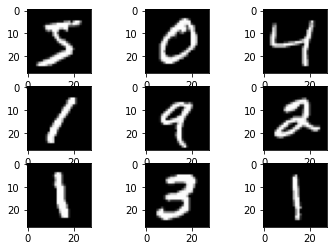

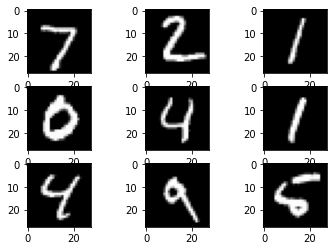

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

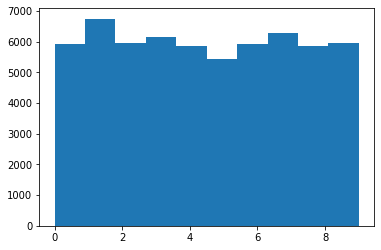

In [3]:
X_train.shape=(60000,28,28,1)
X_test.shape=(10000,28,28,1)

        
for i in range(9):
       plt.subplot(331+i)
       plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

plt.show()


for i in range(9):
     plt.subplot(331+i) 
     plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    



plt.show()




plt.hist(Y_train)



We have understood the dataset and we arrived at the normalization value of 255.
Hence we have normalized the training dataset using this value.

We have also performed One Hot encoding in the validation set for easy recognition.

In [4]:
X_train = X_train/255
X_test = X_test/255
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

Following is the first Model which we have implemented. 
This model consists of a sequential neural network of 4 layers and a final softmax activation layer for classification.

In [5]:
model_Seq = Sequential()
X_train.shape=(60000,784)
X_test.shape=(10000,784)
model_Seq.add(Dense(28,input_dim=28*28,activation='relu'))
model_Seq.add(Dense(32,activation='relu'))
model_Seq.add(Dense(32,activation='relu'))
model_Seq.add(Dense(16,activation='relu'))
model_Seq.add(Dense(10,activation='softmax'))

We have used 'Categorical Crossentropy' to compute the loss incured in the model and we have used the 'ADAGRAD' Optimizer to fit the data into the model using the loss computed above.

In [6]:
model_Seq.compile(loss = 'categorical_crossentropy' , optimizer = 'Adagrad' , metrics= ['accuracy'])
model_Seq.summary()
        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                928       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 24,662
Trainable params: 24,662
Non-trainable params: 0
_________________________________________________________________


The above model is fitted with the training dataset using a Batch-Size of 100 and A Validation-Split of 0.2 for 20 Epochs.

In [7]:
model_Seq.fit(X_train,Y_train,validation_split=0.2,epochs=20,batch_size=100)


Epoch 1/20
480/480 [==============================] - 2s 3ms/step - loss: 2.3024 - accuracy: 0.1263 - val_loss: 2.2694 - val_accuracy: 0.1860
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 2.2517 - accuracy: 0.2179 - val_loss: 2.1837 - val_accuracy: 0.2926
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 2.1477 - accuracy: 0.3298 - val_loss: 2.0037 - val_accuracy: 0.4380
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 1.9465 - accuracy: 0.4579 - val_loss: 1.7478 - val_accuracy: 0.5378
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 1.6921 - accuracy: 0.5544 - val_loss: 1.5064 - val_accuracy: 0.6127
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 1.4618 - accuracy: 0.6191 - val_loss: 1.3150 - val_accuracy: 0.6432
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 1.2886 - accuracy: 0.6433 - val_loss: 1.1585 - val_accuracy: 0.6703
Epoch 

We arrived at an accuracy of 85.18% using the above model.

In [8]:
scores_Seq=model_Seq.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.8524


The following is our 2nd model.
This model consists of KNN classifier which is based on atleast 10 nearest neighbours to classify the given data. 
The training data set is also fitted to this model. 

In [9]:
model_knn = knn(n_neighbors=10)
model_knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=10)

We have arrived at an accuracy of 95.58% for the given test dataset.

In [10]:
scores_knn=model_knn.score(X_test,Y_test)
print(scores_knn)

0.9558


* This is our 3rd and final model.
* This model consists of 4 layers of convolutional neural networks with a kernal size of (4,4) and Relu function as the non-linear activation for the network.
* We have added a few MaxPool Layers to downsample the convoluted layers.
* We have also set 2% of the neural nodes as Dropout to avoid overfitting.
* Finally we have Flattened the outputs of the neural nodes to fit it into a dense network used for classification using Softmax Classifier.

In [11]:
X_train.shape=(60000,28,28,1)
X_test.shape=(10000,28,28,1)
model_conv=Sequential()
model_conv.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = X_train[0].shape))
model_conv.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu'))
model_conv.add(MaxPool2D(pool_size=(2,2)))
model_conv.add(Dropout(0.2))


model_conv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_conv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_conv.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_conv.add(Dropout(0.2))


model_conv.add(Flatten())
model_conv.add(Dense(128, activation = "relu"))
model_conv.add(Dropout(0.15))
model_conv.add(Dense(10, activation = "softmax"))

For this model we have defined our Optimiser as an Eplicitly defined **RMSprop** Optimiser with the learning rate of 0.2% and rho as 0.9 with zero decay.

In [12]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

The above model is compiled with the above defined optimser and categorical crossentropy loss.

In [13]:
model_conv.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

To increase the speed of convergence of the optimser to the global minimum of the loss function we use an Annealer for the learning rate.
This Annealer reduces the learning rate of the model in case of a Plateau like Loss-Landscape.

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.35, 
                                            min_lr=0.00001)

We have re-split the training data into training and validation datasets so that we can use it in data Augmentation.


In [15]:

#X_train.shape=(60000,28,28,1)
#X_test.shape=(10000,28,28,1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=3)
#print(X_train.shape)
#print(X_train[0][0])



We have imported image data generator to augment our training data so as to the have more data for the model to work with and we have fit it with our previously split training data

In [16]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


We have recorded the loss and accuracy history from fitting the training dataset to this model. 
We have incorporated the Annealer and data augmenter into this model.

In [17]:
history = model_conv.fit(datagen.flow(X_train,Y_train, batch_size=100),
                              epochs = 40, validation_data = (X_val,Y_val),
                            verbose = 2, steps_per_epoch=X_train.shape[0] // 100
                             , callbacks=[learning_rate_reduction])

Epoch 1/40
540/540 - 122s - loss: 0.3624 - accuracy: 0.8822 - val_loss: 0.0610 - val_accuracy: 0.9810
Epoch 2/40
540/540 - 122s - loss: 0.1031 - accuracy: 0.9689 - val_loss: 0.0389 - val_accuracy: 0.9863
Epoch 3/40
540/540 - 122s - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 4/40
540/540 - 121s - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 5/40
540/540 - 122s - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoch 6/40
540/540 - 122s - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0273 - val_accuracy: 0.9923
Epoch 7/40
540/540 - 122s - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0225 - val_accuracy: 0.9933
Epoch 8/40
540/540 - 122s - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0186 - val_accuracy: 0.9948
Epoch 9/40
540/540 - 121s - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0229 - val_accuracy: 0.9923
Epoch 10/40
540/540 - 122s - loss: 0.0421 - accuracy: 0.9875 - val_loss: 0.0206 - 

We have plotted the training and validation landscapes stored in the variable history to understand the training process of the model.

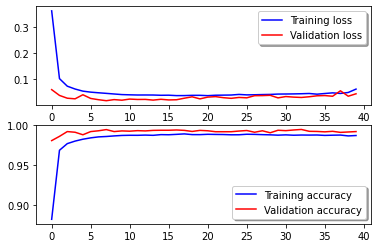

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

We have achieved an accuracy of 99.28% in this model for the given test dataset

In [19]:
scores_Conv=model_conv.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0226 - accuracy: 0.9953


Below is the dataframe of all the 3 models put together in a tabular form

In [20]:
d = {'SNO':[1,2,3],'Model':['Neural Network','KNN Classifier','Convolutional Neural Network'],'Accuracy':[scores_Seq[1],scores_knn,scores_Conv[1]]}

df = pd.DataFrame(d).set_index('SNO')
df.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '10px solid yellow')]}])
print(df)


                            Model  Accuracy
SNO                                        
1                  Neural Network    0.8524
2                  KNN Classifier    0.9558
3    Convolutional Neural Network    0.9953
